In [17]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
from quickda.clean_data import *
from quickda.explore_numeric import *
from quickda.explore_categoric import *
from quickda.explore_numeric_categoric import *
from quickda.explore_time_series import *
from sklearn.feature_extraction.text import CountVectorizer

Carga de datos

In [18]:
#Cargar dataframe y obtener primeros valores para conocimiento de datos
dataframe = pd.read_csv('train.csv', encoding='latin-1',engine='python')
print(dataframe.head())
data_test = pd.read_csv('test.csv', encoding='latin-1',engine='python')
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  Our Deeds are the Reason of this #earthquake M...   
1   4     NaN      NaN             Forest fire near La Ronge Sask. Canada   
2   5     NaN      NaN  All residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  Just got sent this photo from Ruby #Alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 Just happened a terrible car crash
1   2     NaN      NaN  Heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           Apocalypse lighting. #Spokane #wildfires
4  11     NaN      NaN      Typhoon Soudelor kills 28 in China and Taiwan


Limpieza de datos

In [19]:
#Se convierten a minusculas los textos
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = dataframe.loc[i,'text'].lower()

for i in range(len(data_test)):
    data_test.loc[i,'text'] = data_test.loc[i,'text'].lower()

In [20]:
print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this #earthquake m...   
1   4     NaN      NaN             forest fire near la ronge sask. canada   
2   5     NaN      NaN  all residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  just got sent this photo from ruby #alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           apocalypse lighting. #spokane #wildfires
4  11     NaN      NaN      typhoon soudelor kills 28 in china and taiwan


In [21]:
#referencia> https://stackoverflow.com/questions/6718633/python-regular-expression-again-match-url
import re

print(dataframe['text'][31])
#Se eliminan las urls

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', "", dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = re.sub(r'((http|https)\:\/\/)?[a-zA-Z0-9\.\/\?\:@\-_=#]+\.([a-zA-Z]){2,6}([a-zA-Z0-9\.\&\/\?\:@\-_=#])*', '', data_test.loc[i,'text'])


print(dataframe['text'][31])
print(dataframe.head())
print(data_test.head())

@bbcmtd wholesale markets ablaze http://t.co/lhyxeohy6c
@bbcmtd wholesale markets ablaze 
   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this #earthquake m...   
1   4     NaN      NaN             forest fire near la ronge sask. canada   
2   5     NaN      NaN  all residents asked to 'shelter in place' are ...   
3   6     NaN      NaN  13,000 people receive #wildfires evacuation or...   
4   7     NaN      NaN  just got sent this photo from ruby #alaska as ...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about #earthquake is different cities, s...
2   3     NaN      NaN  there is a forest fire at spot pond, geese are...
3   9     NaN      NaN           apocalypse lighting. #spokane #wildfires
4  11

In [22]:
from string import punctuation

#Se eliminan los signos de puntuacion
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = ''.join(c for c in dataframe.loc[i,'text'] if c not in punctuation)

for i in range(len(data_test)):
    data_test.loc[i,'text'] = ''.join(c for c in data_test.loc[i,'text'] if c not in punctuation)

print(dataframe.head())
print(data_test.head())


   id keyword location                                               text  \
0   1     NaN      NaN  our deeds are the reason of this earthquake ma...   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  all residents asked to shelter in place are be...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  just got sent this photo from ruby alaska as s...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                 just happened a terrible car crash
1   2     NaN      NaN  heard about earthquake is different cities sta...
2   3     NaN      NaN  there is a forest fire at spot pond geese are ...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN      typhoon soudelor kills 28 in china and taiwan


In [23]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

#Se eliminan las stopwords
stop_words = stopwords.words('english')

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = ' '.join(word for word in dataframe.loc[i,'text'].split() if word not in stop_words)

for i in range(len(data_test)):
    data_test.loc[i,'text'] = ' '.join(word for word in data_test.loc[i,'text'].split() if word not in stop_words)

print(dataframe.head())
print(data_test.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ALIEWARE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN             typhoon soudelor kills 28 china taiwan


In [24]:
#Se eliminan emojis
emoji_regex = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)

for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = emoji_regex.sub(r'', dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = emoji_regex.sub(r'', data_test.loc[i,'text'])

print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN  13000 people receive wildfires evacuation orde...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN             typhoon soudelor kills 28 china taiwan


In [25]:
#Se eliminan numeros excepto 911
#Referencia : https://stackoverflow.com/questions/57174831/how-to-remove-digits-in-a-string-except-those-in-hashtags-using-regex
for i in range(len(dataframe)):
    dataframe.loc[i,'text'] = re.sub(r'#\S+|\d+',
    lambda match: match.group(0) if match.group(0).startswith('911') else '', dataframe.loc[i,'text'])

for i in range(len(data_test)):
    data_test.loc[i,'text'] = re.sub(r'#\S+|\d+',
    lambda match: match.group(0) if match.group(0).startswith('911') else '', data_test.loc[i,'text'])

print(dataframe.head())
print(data_test.head())

   id keyword location                                               text  \
0   1     NaN      NaN       deeds reason earthquake may allah forgive us   
1   4     NaN      NaN              forest fire near la ronge sask canada   
2   5     NaN      NaN  residents asked shelter place notified officer...   
3   6     NaN      NaN   people receive wildfires evacuation orders ca...   
4   7     NaN      NaN  got sent photo ruby alaska smoke wildfires pou...   

   target  
0       1  
1       1  
2       1  
3       1  
4       1  
   id keyword location                                               text
0   0     NaN      NaN                        happened terrible car crash
1   2     NaN      NaN  heard earthquake different cities stay safe ev...
2   3     NaN      NaN  forest fire spot pond geese fleeing across str...
3   9     NaN      NaN              apocalypse lighting spokane wildfires
4  11     NaN      NaN               typhoon soudelor kills  china taiwan


Frecuencias de palabras

In [26]:
from collections import Counter

positive_disaster = dataframe[dataframe['target'] == 1]
positive_disaster.index = range(len(positive_disaster))
negative_disaster = dataframe[dataframe['target'] == 0]
negative_disaster.index = range(len(negative_disaster))

#Conteo de palabras en tweets positivos
positive_disaster_words = []

for i in range(len(positive_disaster)):
    text = positive_disaster['text'][i].split()
    for word in text:
        positive_disaster_words.append(word)

positive_disaster_words_count = Counter(positive_disaster_words)
print(positive_disaster_words_count.most_common(10))

#Conteo de palabras en tweets negativos
negative_disaster_words = []

for i in range(len(negative_disaster)):
    text = negative_disaster['text'][i].split()
    for word in text:
        negative_disaster_words.append(word)

negative_disaster_words_count = Counter(negative_disaster_words)
print(negative_disaster_words_count.most_common(15))

[('fire', 178), ('news', 140), ('via', 121), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93)]
[('like', 253), ('im', 243), ('amp', 193), ('new', 168), ('get', 163), ('dont', 140), ('one', 128), ('body', 112), ('via', 99), ('would', 97), ('video', 96), ('people', 91), ('love', 89), ('us', 86), ('time', 85)]


Bigrams

<AxesSubplot:xlabel='frequency', ylabel='bigram'>

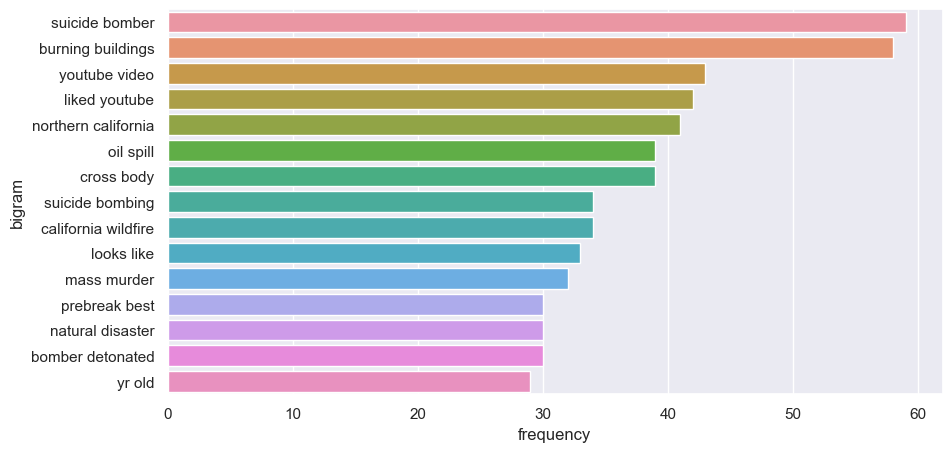

In [53]:
# Referencia: https://medium.com/ironhack/data-visualization-con-pandas-y-seaborn-1044906af34f
def get_bigrams(text):
    c_vec = CountVectorizer(ngram_range=(2,2))
    # matrix of ngrams
    ngrams = c_vec.fit_transform(text)
    # count frequency of ngrams
    count_values = ngrams.toarray().sum(axis=0)
    # list of ngrams
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'bigram'})
    df_ngram.head(10)
    # df_ngram
    return df_ngram
plt.figure(figsize=(10,5))
top_tweets =get_bigrams(dataframe['text'])
top_tweets_bigrams = top_tweets['bigram']
#  get the top 15 bigrams
top_tweet_bigrams=top_tweets_bigrams[:15]
# store the frecuencies in x and the bigrams in y
x=top_tweets['frequency'][:15]
y=top_tweets['bigram'][:15]
sns.barplot(x=x,y=y)

Trigrams

<AxesSubplot:xlabel='frequency', ylabel='trigram'>

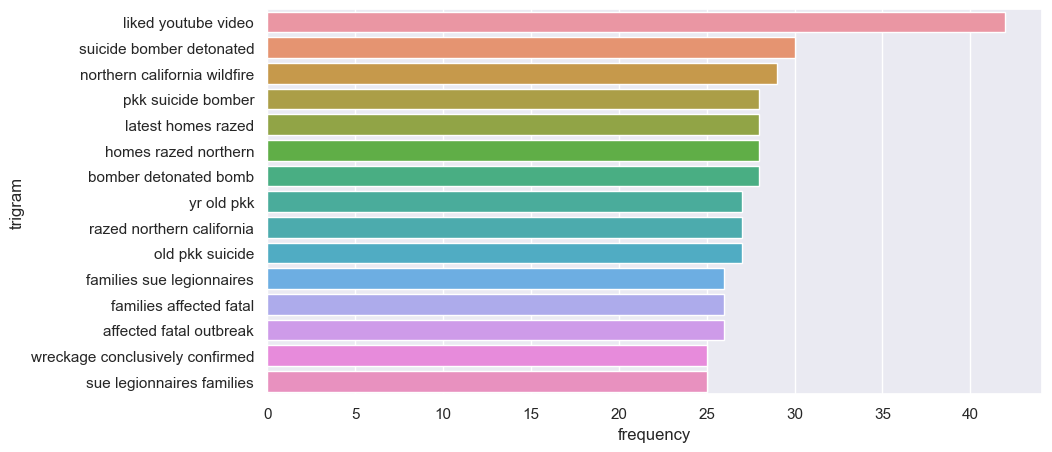

In [52]:
def get_trigrams(text):
    c_vec = CountVectorizer(ngram_range=(3,3))
    # matrix of ngrams
    ngrams = c_vec.fit_transform(text)
    # count frequency of ngrams
    count_values = ngrams.toarray().sum(axis=0)
    # list of ngrams
    vocab = c_vec.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)
                ).rename(columns={0: 'frequency', 1:'trigram'})
    df_ngram.head(10)
    return df_ngram
plt.figure(figsize=(10,5))
top_tweets = get_trigrams(dataframe['text'])
top_tweets_trigrams = top_tweets['trigram']
#  get the top 15 trigrams
top_tweet_trigrams=top_tweets_trigrams[:15]
# store the frecuencies in x and the trigrams in y
x=top_tweets['frequency'][:15]
y=top_tweets['trigram'][:15]
sns.barplot(x=x,y=y)